## Class 02

In [215]:
# setup
%pip install pandas matplotlib seaborn scikit-learn numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [216]:
import pathlib 
import pandas as pd 
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [217]:
path = pathlib.Path.cwd()
datapath = path.parents[4] / "data" / "class_01" / "bikes.csv"
df = pd.read_csv(datapath)

## EXERCISES
1. Create a folder called `group-x` within `nbs/class_02`, `cd` into it and work within that today
2. Choose an outcome variable for a regression problem. On the basis of this, define **which of the evaluation metrics** could be suitable. Evaluation metrics can be computed using scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics 
3. (a) If you are in the bike sharing group, split your dataset into a training/validation/test set using later time points as validation/test set. Validation and test set should be 15% of your data each. (b) If you are in the personality group, using sklearn's `train_test_split` function, create a 70/15/15 random split of your data.
    - Remember to set a seed (`random_state`) when you do so. Let's all use the same (the classic `random_state=42`)
    - Save these datasets as separate csv files in a subfolder called `data`
4. Look at your outcome and predictors: do you want to transform them in any way?
5. Estimate the performance of a dummy baseline (i.e., the mean model) on all splits
6. Now look at your predictors: do they need any preprocessing? Any transformations? Removal of "bad" data points?
7. Fit the other models using KKN (sklearn's `KNeighborsRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) and linear models (`LinearRegressor`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Save the fitted model object (with a meaningful name) using `pickle` (https://scikit-learn.org/stable/model_persistence.html) in a subfolder called `model`.
8. Once you are done, evaluate all models on both the training and the validation set and visualize the scores

## 2. Creating an Outcome

In [218]:
df["proportion_casual_reg"] = df["casual"]/df["cnt"]

Which evaluation metrics would be suitable? We'll chose R-squared as we are interested in a general metric on how good our model fits to the data and not necessarily interested in how our model fares on individual data points. Therefore it would not make sense to use RMSE/MSE as they are scale-dependent

## 2.1 Transforming

In [219]:
columns = ["season", "mnth", "weekday", "weathersit"]

df = pd.get_dummies(df, columns=columns, prefix=columns, dtype=int)

## 3. Splitting our data

In [220]:
len_df = len(df)

# define the split percentage
split_size = 0.15

# get the absolute number of rows that equals to our split size (use int to rm. decimal)
n_rows = int(len_df * split_size)

# define test
test_df = df.iloc[-n_rows:, :]

# define train and val combined
train_val_df = df.iloc[:-n_rows, :]

# subset train from only the train and val 
train_df = train_val_df.iloc[:-n_rows, :]

# subset val from only the train and val
val_df = train_val_df.iloc[-n_rows:, :]

In [221]:
# save dataset
save_path = path.parents[2] / "nbs" / "class_02" / "group-RMDS" / "data"
save_path.mkdir(parents=True, exist_ok=True)

train_df.to_csv(save_path / "train_bikes.csv", index=False)
val_df.to_csv(save_path / "val_bikes.csv", index=False)
test_df.to_csv(save_path / "test_bikes.csv", index=False)

In [222]:
# split into predictors and features
predictors = ["proportion_casual_reg", "registered", "casual", "cnt", "dteday"]
X_train = train_df.drop(predictors, axis=1)
y_train = train_df["proportion_casual_reg"].values

X_val = val_df.drop(predictors, axis=1)
y_val = val_df["proportion_casual_reg"].values

X_test = test_df.drop(predictors, axis=1)
y_test = test_df["proportion_casual_reg"].values

## 5. Dummy Model

In [223]:
dummy_performances = []

mean_value = y_train.mean()
model_name = 'dummy'

for y, nsplit in zip([y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    performance = np.sqrt(mean_squared_error(y, 
                                             [mean_value]*y.shape[0]))
    r2 = r2_score(y, [mean_value]*y.shape[0])
    dummy_performances.append({'model': model_name,
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [224]:
dummy_performances

[{'model': 'dummy', 'split': 'train', 'rmse': 0.1426, 'r2': 0.0},
 {'model': 'dummy', 'split': 'val', 'rmse': 0.1224, 'r2': -0.0753},
 {'model': 'dummy', 'split': 'test', 'rmse': 0.12, 'r2': -0.0734}]

In [225]:
X_train

,instant,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,season_1,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0,0,0,0,0.24,0.2879,0.81,0.0000,1,...,0,0,0,0,0,1,1,0,0,0
1,2,0,1,0,0,0.22,0.2727,0.80,0.0000,1,...,0,0,0,0,0,1,1,0,0,0
2,3,0,2,0,0,0.22,0.2727,0.80,0.0000,1,...,0,0,0,0,0,1,1,0,0,0
3,4,0,3,0,0,0.24,0.2879,0.75,0.0000,1,...,0,0,0,0,0,1,1,0,0,0
4,5,0,4,0,0,0.24,0.2879,0.75,0.0000,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12162,12163,1,23,0,0,0.70,0.6667,0.74,0.2537,0,...,0,0,0,0,0,1,1,0,0,0
12163,12164,1,0,0,0,0.68,0.6364,0.69,0.1642,0,...,0,0,0,0,0,0,0,1,0,0
12164,12165,1,1,0,0,0.66,0.6212,0.74,0.2239,0,...,0,0,0,0,0,0,1,0,0,0
12165,12166,1,2,0,0,0.64,0.6061,0.73,0.2239,0,...,0,0,0,0,0,0,1,0,0,0


## 7. Fit the other models 
 ```
    - Model 0 (dummy baseline): Always predict the average of Y in the training data
    - Model 1: Predict based on a linear model with `instant` as the only predictor
    - Model 2: Model including weather info (temperature, windspeed) and temporal parameters (e.g., `season`, `weekday`) as predictors
    - Model 3: A "kitchen sink" model, will all predictors included
```

In [226]:
models_savepath = path.parents[3] / "models"
models_savepath

PosixPath('/work/code/models')

### Model 1

In [227]:
instant_predictor = X_train["instant"].to_numpy().reshape(-1, 1)

In [228]:
reg = LinearRegression().fit(instant_predictor, y_train)

In [229]:
instant_performances = []

for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    preds = reg.predict(x["instant"].to_numpy().reshape(-1, 1))
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    instant_performances.append({'model': 'instant_mdl',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [230]:
performances

[{'model': 'instant_mdl', 'split': 'train', 'rmse': 0.1295, 'r2': 0.1751},
 {'model': 'instant_mdl', 'split': 'val', 'rmse': 0.1178, 'r2': 0.004},
 {'model': 'instant_mdl', 'split': 'test', 'rmse': 0.1108, 'r2': 0.0854}]

## Model 2

In [231]:
weather_cols = ["temp", "hum", "season_1", "season_2", "season_3", "season_4"]
weather_preds = X_train[weather_cols].values

In [232]:
reg = LinearRegression().fit(weather_preds, y_train)

In [233]:
reg.coef_

array([ 2.80266911e-01, -7.55509182e-02,  1.36805133e+11,  1.36805133e+11,
        1.36805133e+11,  1.36805133e+11])

In [234]:
weather_performances = []

for x,y,nsplit in zip([X_train, X_val, X_test],
                    [y_train, y_val, y_test],
                    ['train', 'val', 'test']):
    preds = reg.predict(x[weather_cols].to_numpy())
    r2 = r2_score(y, preds)
    performance = np.sqrt(mean_squared_error(y, preds))
    weather_performances.append({'model': 'weather_mdl',
                         'split': nsplit,
                         'rmse': performance.round(4),
                         'r2': r2.round(4)})

In [235]:
weather_performances

[{'model': 'weather_mdl', 'split': 'train', 'rmse': 0.1287, 'r2': 0.1857},
 {'model': 'weather_mdl', 'split': 'val', 'rmse': 0.1167, 'r2': 0.0224},
 {'model': 'weather_mdl', 'split': 'test', 'rmse': 0.1088, 'r2': 0.1178}]

In [236]:
all_performances = []
all_performances.extend(dummy_performances)

In [237]:
all_performances.extend(instant_performances)
all_performances.extend(weather_performances)

In [238]:
perf_df = pd.DataFrame(all_performances)

<Axes: xlabel='rmse', ylabel='model'>

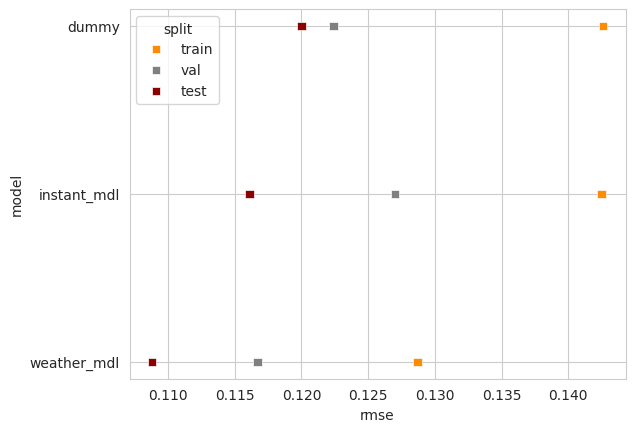

In [239]:
sns.set_style('whitegrid')
sns.scatterplot(data=perf_df.sort_values(by='rmse', ascending=False), 
                y='model', 
                x='rmse', 
                marker='s', 
                hue='split', palette=['darkorange', 'grey', 'darkred'])

<Axes: xlabel='r2', ylabel='model'>

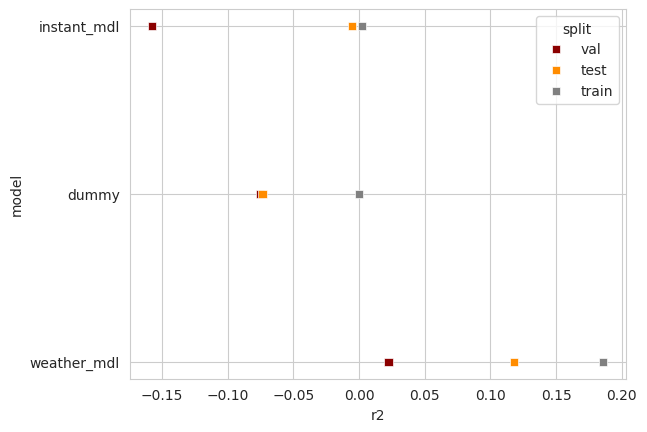

In [240]:
sns.scatterplot(data=perf_df.sort_values(by='r2', ascending=True), 
                y='model', 
                x='r2', 
                marker='s', 
                hue='split', palette=['darkred', 'darkorange', 'grey'])